In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

Aperçu du dataset

Le dataset contient 33 colonnes et 48 019 entrées. La plupart des colonnes sont de type object, ce qui n’est pas directement compatible avec les modèles de machine learning, car ceux-ci nécessitent généralement des entrées numériques.

La variable cible est la dernière colonne, qui représente le salaire annuel en USD (ConvertedCompYearly). C’est cette variable que nous cherchons à prédire.

Structure du dataset et valeurs manquantes

Le dataset contient 48 019 lignes et 33 colonnes.

Parmi ces colonnes, 31 sont de type object, et seulement 2 sont de type numérique (WorkExp et ConvertedCompYearly).

Plusieurs colonnes contiennent des valeurs manquantes, par exemple LearnCodeOnline, DatabaseHaveWorkedWith, PlatformHaveWorkedWith, et AISearchHaveWorkedWith.

La colonne cible est ConvertedCompYearly (salaire annuel en USD).

Ces informations indiquent que nous aurons besoin d’un prétraitement important, notamment pour gérer les valeurs manquantes et convertir les colonnes object en variables utilisables par les modèles de machine learning.

In [ ]:
df = pd.read_csv('survey_results_slim.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48019 entries, 0 to 48018
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   MainBranch                      48019 non-null  object 
 1   Age                             48019 non-null  object 
 2   Employment                      48007 non-null  object 
 3   RemoteWork                      47940 non-null  object 
 4   EdLevel                         48019 non-null  object 
 5   LearnCode                       47935 non-null  object 
 6   LearnCodeOnline                 38414 non-null  object 
 7   YearsCode                       47950 non-null  object 
 8   YearsCodePro                    47825 non-null  object 
 9   DevType                         47904 non-null  object 
 10  OrgSize                         47982 non-null  object 
 11  Country                         48019 non-null  object 
 12  LanguageHaveWorkedWith          

Colonnes avec plus de 50 % de valeurs manquantes

Nous identifions les colonnes qui contiennent plus de la moitié de leurs valeurs manquantes :

AIDevHaveWorkedWith : 70,97 % de valeurs manquantes

AIToolCurrently Using : 59,29 % de valeurs manquantes

Au total, 2 colonnes dépassent le seuil de 50 % de valeurs manquantes.

Ces colonnes seront probablement éliminées ou ignorées dans notre modélisation, car leur taux élevé de données manquantes peut nuire à la performance des modèles.

In [ ]:
missing_pct = (df.isnull().sum() / len(df) * 100).sort_values(ascending= False)
print('missing percentage values >50 : \n', missing_pct[missing_pct>50])
print('total columns wih missing values percentage >50 : \n', (missing_pct>50).sum())

missing percentage values >50 : 
 AIDevHaveWorkedWith      70.969824
AIToolCurrently Using    59.286949
dtype: float64
total columns wih missing values percentage >50 : 
 2


# Suppression des colonnes non pertinentes ou trop manquantes

- Les colonnes contenant **plus de 50 % de valeurs manquantes** ont été identifiées et ajoutées à la liste des colonnes à supprimer.
- D’autres colonnes ont été retirées car elles sont **moins critiques**, **méta**, ou **peu pertinentes pour la modélisation**, par exemple des outils collaboratifs ou des informations personnelles peu exploitables par le modèle.
- Après suppression, nous obtenons un **dataset nettoyé** prêt pour le prétraitement, avec moins de colonnes et moins de valeurs manquantes.

**Statistiques :**  
- Nombre de colonnes supprimées : `len(cols_to_drop)`  
- Nombre de colonnes restantes : `df_cleaned.shape[1]`


In [ ]:
cols_to_drop = missing_pct[missing_pct>50].index.tolist()

cols_to_drop.extend([
    'LearnCodeOnline', #less critical cols
    'OpSysPersonal use', #less critical cols
    'ICorPM', #meta cols
    'ProfessionalTech',#meta cols
    'TBranch',#meta cols
    'AISearchHaveWorkedWith',#high missing percentage
    'MiscTechHaveWorkedWith',#high missing percentage
    'OfficeStackAsyncHaveWorkedWith',#office tools less relevant
    'OfficeStackSyncHaveWorkedWith',#office tools less relevant
    'NEWCollabToolsHaveWorkedWith'#office tools less relevant
])

cols_to_drop = list(set(cols_to_drop))
df_cleaned = df.drop(columns= cols_to_drop )

print( len(cols_to_drop))
print( df_cleaned.shape[1])
print(df_cleaned.columns)

12
21
Index(['MainBranch', 'Age', 'Employment', 'RemoteWork', 'EdLevel', 'LearnCode',
       'YearsCode', 'YearsCodePro', 'DevType', 'OrgSize', 'Country',
       'LanguageHaveWorkedWith', 'DatabaseHaveWorkedWith',
       'PlatformHaveWorkedWith', 'WebframeHaveWorkedWith',
       'ToolsTechHaveWorkedWith', 'OpSysProfessional use', 'AISelect',
       'WorkExp', 'Industry', 'ConvertedCompYearly'],
      dtype='object')


In [ ]:
df_cleaned.head(3)

,MainBranch,Age,Employment,RemoteWork,EdLevel,LearnCode,YearsCode,YearsCodePro,DevType,OrgSize,...,LanguageHaveWorkedWith,DatabaseHaveWorkedWith,PlatformHaveWorkedWith,WebframeHaveWorkedWith,ToolsTechHaveWorkedWith,OpSysProfessional use,AISelect,WorkExp,Industry,ConvertedCompYearly
0,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,18,9,"Senior Executive (C-Suite, VP, etc.)",2 to 9 employees,...,HTML/CSS;JavaScript;Python,Supabase,Amazon Web Services (AWS);Netlify;Vercel,Next.js;React;Remix;Vue.js,Docker;Kubernetes;npm;Pip;Vite;Webpack;Yarn,MacOS;Windows;Windows Subsystem for Linux (WSL),Yes,10.0,"Information Services, IT, Software Development...",285000.0
1,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,27,23,"Developer, back-end","5,000 to 9,999 employees",...,Bash/Shell (all shells);Go,NaN,Amazon Web Services (AWS);Google Cloud;OpenSta...,NaN,Cargo;Docker;Kubernetes;Make;Nix,MacOS;Other Linux-based,"No, and I don't plan to",23.0,"Information Services, IT, Software Development...",250000.0
2,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,12,7,"Developer, front-end",100 to 499 employees,...,Bash/Shell (all shells);HTML/CSS;JavaScript;PH...,PostgreSQL;Redis,Cloudflare;Heroku,Node.js;React;Ruby on Rails;Vue.js;WordPress,Homebrew;npm;Vite;Webpack;Yarn,iOS;iPadOS;MacOS,"No, and I don't plan to",7.0,NaN,156000.0


# Vérification des valeurs manquantes restantes

Après la suppression des colonnes non pertinentes ou trop manquantes, nous vérifions les **valeurs manquantes restantes** dans le dataset nettoyé.

- Les colonnes encore concernées contiennent un pourcentage faible de valeurs manquantes, ce qui est plus facile à gérer pour le prétraitement.
- Ces valeurs pourront être imputées ou traitées selon le type de colonne (numérique ou catégorielle).

> Cette étape permet de s’assurer que le dataset est **suffisamment propre** pour passer aux étapes suivantes de transformation et d’encodage.


In [ ]:
print('missing data remaining\n')
missing_remainder = (df_cleaned.isnull().sum() / len(df) * 100).sort_values(ascending= False)
print(missing_remainder[missing_remainder>0])

missing data remaining

Industry                   42.216623
WorkExp                    32.031071
PlatformHaveWorkedWith     22.166226
WebframeHaveWorkedWith     21.145796
DatabaseHaveWorkedWith     13.026094
ToolsTechHaveWorkedWith     8.255066
OpSysProfessional use       6.224619
YearsCodePro                0.404007
LanguageHaveWorkedWith      0.283221
DevType                     0.239489
LearnCode                   0.174931
RemoteWork                  0.164518
YearsCode                   0.143693
OrgSize                     0.077053
Employment                  0.024990
dtype: float64


In [ ]:
print('\n Data types :')
print(df_cleaned.dtypes.value_counts())


 Data types :
object     19
float64     2
Name: count, dtype: int64


In [ ]:
key_columns = ['Country', 'DevType', 'EdLevel', 'Employment']

for col in key_columns:
    print(f"Number of unique values in '{col}':")
    print(len(df_cleaned[col].unique()))

Number of unique values in 'Country':
171
Number of unique values in 'DevType':
34
Number of unique values in 'EdLevel':
8
Number of unique values in 'Employment':
15


In [ ]:
df_model = df_cleaned.dropna().copy()

df_model.shape

(16460, 21)

In [ ]:
print(f"Number of rows retained: {df_model.shape[0]}")
percentage_dropped = ((len(df) - df_model.shape[0]) / len(df)) * 100
print(f"Percentage of rows dropped: {percentage_dropped:.2f}%")

Number of rows retained: 16460
Percentage of rows dropped: 65.72%


In [ ]:
# Revert ConvertedCompYearly in df_model to its original values from df_cleaned
df_model['ConvertedCompYearly'] = df_cleaned['ConvertedCompYearly'].loc[df_model.index]

print('Descriptive statistics for the reverted target variable (ConvertedCompYearly):')

# Set display option to show exact numbers for floats
pd.options.display.float_format = '{:,.0f}'.format
print(df_model['ConvertedCompYearly'].describe())

print(f"Number of original salaries > 500,000: {(df_model['ConvertedCompYearly']>500000).sum()}")
print(f"Number of original salaries < 10,000: {(df_model['ConvertedCompYearly']<10000).sum()}")

Descriptive statistics for the reverted target variable (ConvertedCompYearly):
count       16,460
mean        94,124
std        130,977
min              1
25%         43,621
50%         74,963
75%        123,153
max     10,319,366
Name: ConvertedCompYearly, dtype: float64
Number of original salaries > 500,000: 51
Number of original salaries < 10,000: 1100


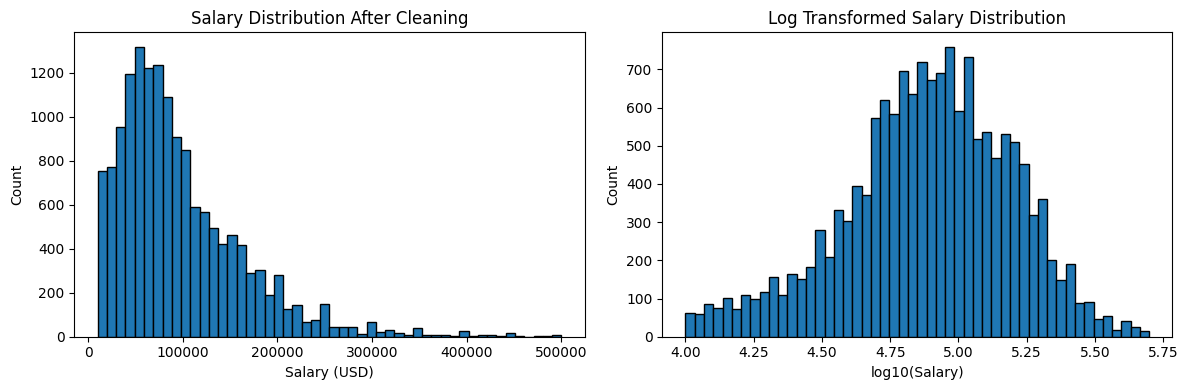

In [ ]:
df_model = df_model[
    (df_model['ConvertedCompYearly']>= 10000) &
    (df_model['ConvertedCompYearly']<=500000)
]

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.hist(df_model['ConvertedCompYearly'], bins = 50 , edgecolor='black')
plt.xlabel('Salary (USD)')
plt.ylabel('Count')
plt.title('Salary Distribution After Cleaning')

plt.subplot(1,2,2)
plt.hist(np.log10(df_model['ConvertedCompYearly']),bins=50 , edgecolor = 'black')
plt.xlabel('log10(Salary)')
plt.ylabel('Count')
plt.title('Log Transformed Salary Distribution')

plt.tight_layout()
plt.show()

In [ ]:
df_model.head(1)

,MainBranch,Age,Employment,RemoteWork,EdLevel,LearnCode,YearsCode,YearsCodePro,DevType,OrgSize,...,LanguageHaveWorkedWith,DatabaseHaveWorkedWith,PlatformHaveWorkedWith,WebframeHaveWorkedWith,ToolsTechHaveWorkedWith,OpSysProfessional use,AISelect,WorkExp,Industry,ConvertedCompYearly
0,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,18,9,"Senior Executive (C-Suite, VP, etc.)",2 to 9 employees,...,HTML/CSS;JavaScript;Python,Supabase,Amazon Web Services (AWS);Netlify;Vercel,Next.js;React;Remix;Vue.js,Docker;Kubernetes;npm;Pip;Vite;Webpack;Yarn,MacOS;Windows;Windows Subsystem for Linux (WSL),Yes,10,"Information Services, IT, Software Development...","285,000"


# Création de nouvelles features à partir des colonnes multi-sélection

Pour mieux exploiter les informations des stacks et technologies, nous avons créé des **features numériques** qui comptent le nombre d'éléments sélectionnés dans chaque catégorie :

- `Num_Languages` : nombre de langages de programmation connus
- `Num_Databases` : nombre de bases de données utilisées
- `Num_Platforms` : nombre de plateformes utilisées
- `Num_Webframes` : nombre de frameworks web connus
- `Num_Tools` : nombre d'outils et technologies maîtrisés

Nous avons également créé la feature `Total_Skills` comme **somme de toutes ces compétences**, afin de représenter le niveau global de compétences techniques.

Enfin, nous avons calculé la **corrélation de ces features avec le salaire annuel (`ConvertedCompYearly`)**, ce qui permet d’identifier quelles compétences sont les plus associées à un salaire élevé.


In [ ]:
#creating features for all ech stack columns

print('creating cpunt features for multi-select columns')

df_model['Num_Languages']= df_model['LanguageHaveWorkedWith'].str.count(';')+1

df_model['Num_Databases']= df_model['DatabaseHaveWorkedWith'].str.count(';')+1

df_model['Num_Platforms']= df_model['PlatformHaveWorkedWith'].str.count(';')+1

df_model['Num_Webframes']= df_model['WebframeHaveWorkedWith'].str.count(';')+1

df_model['Num_Tools']= df_model['ToolsTechHaveWorkedWith'].str.count(';')+1


print('Count feature statistics')

count_cols = ['Num_Languages','Num_Databases','Num_Platforms','Num_Webframes','Num_Tools']


print(df_model[count_cols].describe())

df_model['Total_Skills'] = (
    df_model['Num_Languages']+
    df_model['Num_Databases']+
    df_model['Num_Platforms']+
    df_model['Num_Webframes']+
    df_model['Num_Tools']
)

print('total skills distribution :\n')
print(df_model['Total_Skills'].describe())


print('correlation with salary : \n')
correlation_data = df_model[count_cols + ['Total_Skills', 'ConvertedCompYearly']].corr()['ConvertedCompYearly'].sort_values()
print(correlation_data)



creating cpunt features for multi-select columns
Count feature statistics
       Num_Languages  Num_Databases  Num_Platforms  Num_Webframes  Num_Tools
count         15,309         15,309         15,309         15,309     15,309
mean               6              3              2              4          6
std                3              2              2              2          3
min                1              1              1              1          1
25%                4              2              1              2          3
50%                5              3              2              3          5
75%                7              4              3              5          7
max               41             30             17             32         37
total skills distribution :

count   15,309
mean        21
std          9
min          5
25%         15
50%         19
75%         25
max        140
Name: Total_Skills, dtype: float64
correlation with salary : 

Num_Webframes        

# Création des features de comptage pour les colonnes multi-sélection

Pour exploiter les informations des stacks techniques (langages, bases de données, frameworks, plateformes et outils), nous avons créé des **features numériques** correspondant au nombre d'éléments mentionnés dans chaque colonne multi-sélection.  

Les colonnes créées sont :

- `Num_Languages` : nombre de langages de programmation connus
- `Num_Databases` : nombre de bases de données utilisées
- `Num_Platforms` : nombre de plateformes utilisées
- `Num_Webframes` : nombre de frameworks web connus
- `Num_Tools` : nombre d'outils/technologies maîtrisés

Nous avons également calculé une feature globale `Total_Skills` qui **somme toutes ces compétences**, afin d’avoir un indicateur du niveau technique total.  

Ensuite, nous avons observé les **statistiques descriptives** de ces features (moyenne, min, max, quartiles) et calculé la **corrélation avec le salaire annuel (`ConvertedCompYearly`)**, pour identifier quelles compétences sont les plus liées à un salaire élevé.


In [ ]:
# creating features for all ech stack columns

print('creating cpunt features for multi-select columns')

df_model['Num_Languages'] = df_model['LanguageHaveWorkedWith'].fillna('').apply(lambda x: 0 if str(x).strip() == '' else str(x).count(';') + 1)
df_model['Num_Databases'] = df_model['DatabaseHaveWorkedWith'].fillna('').apply(lambda x: 0 if str(x).strip() == '' else str(x).count(';') + 1)
df_model['Num_Platforms'] = df_model['PlatformHaveWorkedWith'].fillna('').apply(lambda x: 0 if str(x).strip() == '' else str(x).count(';') + 1)
df_model['Num_Webframes'] = df_model['WebframeHaveWorkedWith'].fillna('').apply(lambda x: 0 if str(x).strip() == '' else str(x).count(';') + 1)
df_model['Num_Tools'] = df_model['ToolsTechHaveWorkedWith'].fillna('').apply(lambda x: 0 if str(x).strip() == '' else str(x).count(';') + 1)

print('Count feature statistics')

count_cols = ['Num_Languages','Num_Databases','Num_Platforms','Num_Webframes','Num_Tools']

print(df_model[count_cols].describe())

df_model['Total_Skills'] = (
    df_model['Num_Languages'] +
    df_model['Num_Databases'] +
    df_model['Num_Platforms'] +
    df_model['Num_Webframes'] +
    df_model['Num_Tools']
)

print('total skills distribution :\n')
print(df_model['Total_Skills'].describe())

print('correlation with salary : \n')
pd.set_option('display.float_format', lambda x: '%.6f' % x)
correlation_data = df_model[count_cols + ['Total_Skills', 'ConvertedCompYearly']].corr()['ConvertedCompYearly'].sort_values()
print(correlation_data)


creating cpunt features for multi-select columns
Count feature statistics
       Num_Languages  Num_Databases  Num_Platforms  Num_Webframes  Num_Tools
count         15,309         15,309         15,309         15,309     15,309
mean               6              3              2              4          6
std                3              2              2              2          3
min                1              1              1              1          1
25%                4              2              1              2          3
50%                5              3              2              3          5
75%                7              4              3              5          7
max               41             30             17             32         37
total skills distribution :

count   15,309
mean        21
std          9
min          5
25%         15
50%         19
75%         25
max        140
Name: Total_Skills, dtype: float64
correlation with salary : 

Num_Webframes        

# Analyse des technologies les plus utilisées

Pour mieux comprendre le profil technique des répondants, nous avons extrait et compté les occurrences de chaque élément dans les colonnes multi-sélection.  

- **Top 20 langages de programmation** : identification des langages les plus populaires parmi les développeurs.  
- **Top 15 bases de données** : montre quelles bases sont le plus utilisées ou maîtrisées.  
- **Top 15 plateformes** : met en évidence les plateformes préférées pour le développement.  
- **Top 15 frameworks web** : indique les frameworks front-end/back-end les plus répandus.

Cette analyse permet de prioriser les technologies à encoder pour la modélisation et de comprendre les tendances techniques dans l’échantillon.


In [ ]:
print('top 20 Languages :\n')
all_langs = df_model['LanguageHaveWorkedWith'].str.split(';').explode()
print(all_langs.value_counts().head(20))

print('top 15 Databases :\n')
all_dbs = df_model['DatabaseHaveWorkedWith'].str.split(';').explode()
print(all_dbs.value_counts().head(15))

print('top 15 Platforms :\n')
all_Platforms = df_model['PlatformHaveWorkedWith'].str.split(';').explode()
print(all_Platforms.value_counts().head(15))

print('top 15 Web frameworks :\n')
all_Platforms = df_model['WebframeHaveWorkedWith'].str.split(';').explode()
print(all_Platforms.value_counts().head(15))

top 20 Languages :

LanguageHaveWorkedWith
JavaScript                 11851
SQL                         9565
HTML/CSS                    9423
TypeScript                  8868
Python                      7193
Bash/Shell (all shells)     6042
C#                          5108
Java                        4645
PHP                         3059
Go                          2840
PowerShell                  2747
C++                         2028
Rust                        1988
C                           1691
Kotlin                      1635
Ruby                        1538
Dart                         909
Lua                          857
Groovy                       758
Swift                        704
Name: count, dtype: int64
top 15 Databases :

DatabaseHaveWorkedWith
PostgreSQL                    8827
MySQL                         6112
Redis                         4865
Microsoft SQL Server          4599
SQLite                        4586
MongoDB                       4273
Elasticsearch     

# Création de variables binaires pour les compétences techniques

Pour préparer les données pour les modèles de machine learning, nous avons créé des colonnes binaires (`0` ou `1`) indiquant si un répondant possède certaines compétences :

- **Langages spécialisés à forte rémunération** : Rust, Go, Scala, Kotlin, Swift.  
- **Langages populaires et polyvalents** : Python, JavaScript, TypeScript, Java, C#, SQL.  
- **Bases de données** : PostgreSQL, MongoDB, Redis, Elasticsearch.  
- **Plateformes cloud** : AWS, Azure, GCP.  
- **Frameworks web** : React, Next.js, Node.js, Spring Boot.  
- **Outils d’infrastructure et DevOps** : Docker, Kubernetes, Terraform.  

Cette transformation permet de convertir les colonnes multi-sélections en variables numériques exploitables pour les modèles de régression.


In [ ]:
#High paying specialized languages
df_model['Has_Rust'] = df_model['LanguageHaveWorkedWith'].str.contains('Rust',na=False).astype(int)
df_model['Has_Go'] = df_model['LanguageHaveWorkedWith'].str.contains('Go',na=False).astype(int)
df_model['Has_Scala'] = df_model['LanguageHaveWorkedWith'].str.contains('Scala', na=False).astype(int)
df_model['Has_Kotlin'] = df_model['LanguageHaveWorkedWith'].str.contains('Kotlin', na=False).astype(int)
df_model['Has_Swift'] = df_model['LanguageHaveWorkedWith'].str.contains('Swift', na=False).astype(int)
#Popular versitle languages
df_model['Has_Python'] = df_model['LanguageHaveWorkedWith'].str.contains('Python',na=False).astype(int)
df_model['Has_JavaScript'] = df_model['LanguageHaveWorkedWith'].str.contains('JavaScript', na=False).astype(int)
df_model['Has_TypeScript'] = df_model['LanguageHaveWorkedWith'].str.contains('TypeScript', na=False).astype(int)
df_model['Has_Java'] = df_model['LanguageHaveWorkedWith'].str.contains('Java', na=False).astype(int)
df_model['Has_CSharp'] = df_model['LanguageHaveWorkedWith'].str.contains('C#', na=False).astype(int)
df_model['Has_SQL'] = df_model['LanguageHaveWorkedWith'].str.contains('SQL', na=False).astype(int)
#Databases
df_model['Has_PostgreSQL'] = df_model['DatabaseHaveWorkedWith'].str.contains('PostgreSQL', na=False).astype(int)
df_model['Has_MongoDB'] = df_model['DatabaseHaveWorkedWith'].str.contains('MongoDB', na=False).astype(int)
df_model['Has_Redis'] = df_model['DatabaseHaveWorkedWith'].str.contains('Redis', na=False).astype(int)
df_model['Has_Elasticsearch'] = df_model['DatabaseHaveWorkedWith'].str.contains('Elasticsearch', na=False).astype(int)
#Cloud platforms
df_model['Has_AWS'] = df_model['PlatformHaveWorkedWith'].str.contains('Amazon Web Services|AWS', na=False).astype(int)
df_model['Has_Azure'] = df_model['PlatformHaveWorkedWith'].str.contains('Azure', na=False).astype(int)
df_model['Has_GCP'] = df_model['PlatformHaveWorkedWith'].str.contains('Google Cloud', na=False).astype(int)
#web Frameworks
df_model['Has_React'] = df_model['WebframeHaveWorkedWith'].str.contains('React', na=False).astype(int)
df_model['Has_NextJS'] = df_model['WebframeHaveWorkedWith'].str.contains('Next.js', na=False).astype(int)
df_model['Has_NodeJS'] = df_model['WebframeHaveWorkedWith'].str.contains('Node.js', na=False).astype(int)
df_model['Has_SpringBoot'] = df_model['WebframeHaveWorkedWith'].str.contains('Spring Boot', na=False).astype(int)
#Infrastracture Tools
df_model['Has_Docker'] = df_model['ToolsTechHaveWorkedWith'].str.contains('Docker', na=False).astype(int)
df_model['Has_Kubernetes'] = df_model['ToolsTechHaveWorkedWith'].str.contains('Kubernetes', na=False).astype(int)
df_model['Has_Terraform'] = df_model['ToolsTechHaveWorkedWith'].str.contains('Terraform', na=False).astype(int)


In [ ]:
df_model.columns

Index(['MainBranch', 'Age', 'Employment', 'RemoteWork', 'EdLevel', 'LearnCode',
       'YearsCode', 'YearsCodePro', 'DevType', 'OrgSize', 'Country',
       'LanguageHaveWorkedWith', 'DatabaseHaveWorkedWith',
       'PlatformHaveWorkedWith', 'WebframeHaveWorkedWith',
       'ToolsTechHaveWorkedWith', 'OpSysProfessional use', 'AISelect',
       'WorkExp', 'Industry', 'ConvertedCompYearly', 'Num_Languages',
       'Num_Databases', 'Num_Platforms', 'Num_Webframes', 'Num_Tools',
       'Total_Skills', 'Has_Rust', 'Has_Go', 'Has_Scala', 'Has_Kotlin',
       'Has_Swift', 'Has_Python', 'Has_JavaScript', 'Has_TypeScript',
       'Has_Java', 'Has_CSharp', 'Has_SQL', 'Has_PostgreSQL', 'Has_MongoDB',
       'Has_Redis', 'Has_Elasticsearch', 'Has_AWS', 'Has_Azure', 'Has_GCP',
       'Has_React', 'Has_NextJS', 'Has_NodeJS', 'Has_SpringBoot', 'Has_Docker',
       'Has_Kubernetes', 'Has_Terraform'],
      dtype='object')

# Analyse de corrélation et nettoyage des colonnes originales

1. **Corrélation des compétences avec le salaire** :  
   On calcule la corrélation entre chaque colonne binaire de compétence (`Has_...`) et la rémunération (`ConvertedCompYearly`). Cela permet d’identifier les compétences les plus liées à un salaire plus élevé.

2. **Suppression des colonnes originales** :  
   Après avoir créé les variables binaires et les compteurs de compétences, les colonnes multi-sélections d'origine (`LanguageHaveWorkedWith`, `DatabaseHaveWorkedWith`, etc.) ainsi que les colonnes de totaux et compteurs (`Num_Languages`, `Total_Skills`, etc.) sont supprimées pour ne garder que les variables numériques exploitables par les modèles de machine learning.

3. **Nouvelle structure du dataframe** :  
   Le dataframe final ne contient plus que les colonnes numériques (int ou float) prêtes pour l’entraînement des modèles. Les types de colonnes sont vérifiés pour s’assurer que tous les formats sont compatibles avec la modélisation.


In [ ]:
skill_features = [col for col in df_model.columns if col.startswith('Has_')]
skill_corr = df_model[skill_features + ['ConvertedCompYearly']].corr()['ConvertedCompYearly'].sort_values(ascending = False)

print('ALL skill correlations sorted')
print(skill_corr[skill_corr.index != 'CondertedCompYearly'])


cols_to_drop_final = [
    'LanguageHaveWorkedWith',
    'DatabaseHaveWorkedWith',
    'PlatformHaveWorkedWith',
    'WebframeHaveWorkedWith',
    'ToolsTechHaveWorkedWith',
    'Num_Languages',
    'Num_Databases',
    'Num_Platforms',
    'Num_Webframes',
    'Num_Tools',
    'Total_Skills'
]

df_model = df_model.drop(columns = cols_to_drop_final)

print('Final shape with binary encoding', df_model.shape)
print('feature types :', df_model.dtypes.value_counts())



ALL skill correlations sorted
ConvertedCompYearly    1.000000
Has_Terraform          0.177524
Has_AWS                0.142293
Has_Kubernetes         0.128906
Has_Go                 0.123166
Has_Rust               0.082603
Has_Python             0.079271
Has_Docker             0.064240
Has_Redis              0.061930
Has_React              0.061303
Has_Elasticsearch      0.053530
Has_PostgreSQL         0.049394
Has_Scala              0.046563
Has_TypeScript         0.037359
Has_GCP                0.035238
Has_Swift              0.023807
Has_Kotlin             0.014656
Has_SQL                0.005919
Has_Azure             -0.014817
Has_JavaScript        -0.015086
Has_NextJS            -0.017373
Has_Java              -0.017985
Has_CSharp            -0.020396
Has_NodeJS            -0.024481
Has_SpringBoot        -0.035489
Has_MongoDB           -0.095041
Name: ConvertedCompYearly, dtype: float64
Final shape with binary encoding (15309, 41)
feature types : int64      25
object     14
float64

In [ ]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15309 entries, 0 to 48017
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   MainBranch             15309 non-null  object 
 1   Age                    15309 non-null  object 
 2   Employment             15309 non-null  object 
 3   RemoteWork             15309 non-null  object 
 4   EdLevel                15309 non-null  object 
 5   LearnCode              15309 non-null  object 
 6   YearsCode              15309 non-null  object 
 7   YearsCodePro           15309 non-null  object 
 8   DevType                15309 non-null  object 
 9   OrgSize                15309 non-null  object 
 10  Country                15309 non-null  object 
 11  OpSysProfessional use  15309 non-null  object 
 12  AISelect               15309 non-null  object 
 13  WorkExp                15309 non-null  float64
 14  Industry               15309 non-null  object 
 15  Convert

In [ ]:
categorical_cols = df_model.select_dtypes(include='object').columns.tolist()

print('Remaining categorical columns:')
for col in categorical_cols:
    n_unique = df_model[col].nunique()
    print(f"\n{col}: {n_unique} unique values")
    if n_unique <= 20:
        print(df_model[col].value_counts())
    else:
        print(f"Top 10:\n{df_model[col].value_counts().head(10)}")


Remaining categorical columns:

MainBranch: 2 unique values
MainBranch
I am a developer by profession                                                           14757
I am not primarily a developer, but I write code sometimes as part of my work/studies      552
Name: count, dtype: int64

Age: 8 unique values
Age
25-34 years old       7575
35-44 years old       4552
18-24 years old       1450
45-54 years old       1326
55-64 years old        357
65 years or older       35
Under 18 years old       7
Prefer not to say        7
Name: count, dtype: int64

Employment: 10 unique values
Employment
Employed, full-time                                                                             12724
Employed, full-time;Independent contractor, freelancer, or self-employed                         1412
Independent contractor, freelancer, or self-employed                                              787
Employed, part-time                                                                               

In [ ]:
# drop columns that are too complex to be useful : LearnCode, OpSysProfessional

df_model= df_model.drop(columns=['LearnCode', 'OpSysProfessional use'])


# Encodage ordinal des variables catégorielles

Pour permettre aux modèles de machine learning de traiter certaines variables qualitatives, on applique un **encodage ordinal** :

1. **Âge (`Age`)** :  
   Chaque tranche d’âge est convertie en un nombre entier croissant selon l’âge. Les valeurs “Prefer not to say” sont placées au milieu pour représenter une neutralité.

2. **Niveau d’éducation (`EdLevel`)** :  
   Les diplômes et niveaux d’éducation sont mappés en ordre croissant de niveau de qualification. La catégorie “Something else” est considérée neutre.

3. **Taille de l’organisation (`OrgSize`)** :  
   Chaque intervalle de taille d’entreprise est converti en un entier, avec “I don’t know” placé au milieu comme valeur neutre.

Après cette étape, les colonnes originales (`Age`, `EdLevel`, `OrgSize`) sont supprimées et remplacées par leurs équivalents numériques, prêtes pour l’entraînement des modèles.


In [ ]:
#Ordinal encoding

age_order = {
    'Under 10 years old':0,
    '18-24 years old':1,
    '25-34 years old':2,
    '35-44 years old':3,
    '45-54 years old':4,
    '55-64 years old':5,
    '65 years or older':6,
    'Prefer not to say':2, #Assign to middle age as neutral
}

df_model['Age_Ordinal']= df_model['Age'].map(age_order)
df_model = df_model.drop(columns=['Age'])

edlevel_order = {
    'Primary/elementary school': 0,
    'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)': 1,
    'Some college/university study without earning a degree': 2,
    'Associate degree (A.A., A.S., etc.)': 3,
    'Bachelor’s degree (B.A., B.S., B.Eng., etc.)': 4,
    'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)': 5,
    'Professional degree (JD, MD, Ph.D, Ed.D, etc.)': 6,
    'Something else': 2  # neutral
}
df_model['EdLevel_Ordinal'] = df_model['EdLevel'].map(edlevel_order)
df_model = df_model.drop(columns=['EdLevel'])

orgsize_order = {
    'Just me - I am a freelancer, sole proprietor, etc.': 0,
    '2 to 9 employees': 1,
    '10 to 19 employees': 2,
    '20 to 99 employees': 3,
    '100 to 499 employees': 4,
    '500 to 999 employees': 5,
    '1,000 to 4,999 employees': 6,
    '5,000 to 9,999 employees': 7,
    '10,000 or more employees': 8,
    'I don’t know': 4  # neutral
}

df_model['OrgSize_Ordinal'] = df_model['OrgSize'].map(orgsize_order)
df_model = df_model.drop(columns=['OrgSize'])


# Simplification de la colonne `Employment`

La colonne originale contenait de nombreuses catégories détaillées d’emploi, certaines très rares.  
On crée une version simplifiée `Employment_Simple` regroupant les valeurs en catégories principales :  

- **Full-time** : employé à plein temps  
- **Freelance** : indépendant, freelance ou auto-entrepreneur  
- **Full-time + Freelance** : combinant travail à plein temps et missions freelances  
- **Part-time** : emploi à temps partiel  
- **Unknown** : valeur manquante  
- **Other** : toutes les autres catégories moins fréquentes  

Cette consolidation permet de réduire la complexité et facilite l’apprentissage des modèles. La colonne originale est supprimée.


In [ ]:
#simplify employment consolidate rare categories

def simplify_employment(emp):
  if pd.isna(emp):
    return 'Unknown'
  elif 'Employed, full-time' in emp and 'Independent contractor' in emp :
    return 'Full-time + Freelance'
  elif 'Employed, full-time' in emp :
    return 'Full-time'
  elif 'Independent contractor' in emp or 'freelancer' in emp or 'self-employed' in emp :
    return 'Freelance'
  elif 'part-time' in emp :
    return 'Part-time'
  else :
    return 'Other'


df_model['Employment_Simple']= df_model['Employment'].apply(simplify_employment)
df_model= df_model.drop(columns=['Employment'])

df_model['Employment_Simple'].value_counts()

,count
Employment_Simple,
Full-time,12776
Full-time + Freelance,1462
Freelance,866
Part-time,205


# Encodage One-Hot des colonnes catégorielles

Certaines colonnes catégorielles comme `MainBranch`, `RemoteWork`, `AISelect` et `Employment_Simple` ont été converties en variables binaires (one-hot encoding) afin de pouvoir les utiliser dans les modèles de machine learning.  

De même, la colonne `Industry` a été transformée en plusieurs colonnes binaires représentant chaque secteur.  

On supprime les colonnes originales après la transformation pour ne conserver que les variables numériques.


In [ ]:
one_hot_cols = ['MainBranch','RemoteWork','AISelect','Employment_Simple']

for col in one_hot_cols :
  dummies= pd.get_dummies(df_model[col], prefix=col, drop_first=True)
  df_model= pd.concat([df_model, dummies], axis=1)
  df_model= df_model.drop(columns=[col])

industry_dummies = pd.get_dummies(df_model['Industry'], prefix = 'Industry', drop_first = True)
df_model = pd.concat([df_model, industry_dummies], axis=1)
df_model= df_model.drop(columns=['Industry'])

In [ ]:
df_model['YearsCode']= pd.to_numeric(df_model['YearsCode'],errors='coerce')
df_model['YearsCodePro'] = pd.to_numeric(df_model['YearsCodePro'], errors='coerce')

print('\n numeric columns check:')
df_model[['YearsCode','YearsCodePro','WorkExp']].describe()


 numeric columns check:


,YearsCode,YearsCodePro,WorkExp
count,15289.000000,15073.000000,15309.000000
mean,15.429394,10.708286,11.621073
std,8.859019,7.684437,8.334593
min,1.000000,1.000000,0.000000
25%,9.000000,5.000000,5.000000
50%,13.000000,9.000000,10.000000
75%,20.000000,15.000000,16.000000
max,50.000000,50.000000,50.000000


# Regroupement et encodage de la colonne DevType

Pour la colonne `DevType` (type de développeur), nous avons conservé les 10 catégories les plus fréquentes et regroupé toutes les autres sous "Other".  

Ensuite, nous avons appliqué un encodage one-hot sur cette colonne regroupée et supprimé les colonnes originales afin d'obtenir uniquement des variables numériques exploitables par les modèles.


In [ ]:
# 1. Get top 10 DevType values from the original 'DevType' column
top_10_devtypes = df_model['DevType'].value_counts().head(10).index

# 2. Create the grouped version
df_model['DevType_Grouped'] = df_model['DevType'].apply(
    lambda x: x if x in top_10_devtypes else 'Other'
)

# 3. One-hot encode
devtype_dummies = pd.get_dummies(
    df_model['DevType_Grouped'],
    prefix='DevType',
    drop_first=True
)

# 4. Add new columns and drop old ones
df_model = pd.concat([df_model, devtype_dummies], axis=1)
df_model = df_model.drop(columns=['DevType', 'DevType_Grouped'])


# Regroupement et encodage de la colonne Country

Pour la colonne `Country`, nous avons conservé les 15 pays les plus représentés et regroupé tous les autres sous "Other".  

Un encodage one-hot a ensuite été appliqué sur cette version regroupée, et les colonnes originales ont été supprimées pour garder uniquement des variables numériques adaptées aux modèles de machine learning.


In [ ]:
# 1. Get top 15 countries from the original 'Country' column
top_15_countries = df_model['Country'].value_counts().head(15).index

# 2. Create grouped version
df_model['Country_Grouped'] = df_model['Country'].apply(
    lambda x: x if x in top_15_countries else 'Other'
)

# 3. One-hot encode
country_dummies = pd.get_dummies(
    df_model['Country_Grouped'],
    prefix='Country',
    drop_first=True
)

# 4. Add encoded columns + drop original columns
df_model = pd.concat([df_model, country_dummies], axis=1)
df_model = df_model.drop(columns=['Country', 'Country_Grouped'])


In [ ]:
print(df_model.dtypes.value_counts())
print('ALL NUMERIC?',df_model.select_dtypes(include='object').shape[1]==0)

null_counts = df_model.isnull().sum()
print('remaining nulls :',null_counts[null_counts > 0])

bool       44
int64      27
float64     5
Name: count, dtype: int64
ALL NUMERIC? True
remaining nulls : YearsCode        20
YearsCodePro    236
Age_Ordinal       7
dtype: int64


In [ ]:
df_model = df_model.dropna()

In [ ]:
df_model.shape
pd.set_option('display.max_columns', None)
df_model.head()


,YearsCode,YearsCodePro,WorkExp,ConvertedCompYearly,Has_Rust,Has_Go,Has_Scala,Has_Kotlin,Has_Swift,Has_Python,Has_JavaScript,Has_TypeScript,Has_Java,Has_CSharp,Has_SQL,Has_PostgreSQL,Has_MongoDB,Has_Redis,Has_Elasticsearch,Has_AWS,Has_Azure,Has_GCP,Has_React,Has_NextJS,Has_NodeJS,Has_SpringBoot,Has_Docker,Has_Kubernetes,Has_Terraform,Age_Ordinal,EdLevel_Ordinal,OrgSize_Ordinal,"MainBranch_I am not primarily a developer, but I write code sometimes as part of my work/studies",RemoteWork_In-person,RemoteWork_Remote,"AISelect_No, but I plan to soon",AISelect_Yes,Employment_Simple_Full-time,Employment_Simple_Full-time + Freelance,Employment_Simple_Part-time,Industry_Financial Services,Industry_Healthcare,Industry_Higher Education,"Industry_Information Services, IT, Software Development, or other Technology",Industry_Insurance,Industry_Legal Services,"Industry_Manufacturing, Transportation, or Supply Chain",Industry_Oil & Gas,Industry_Other,Industry_Retail and Consumer Services,Industry_Wholesale,DevType_DevOps specialist,"DevType_Developer, back-end","DevType_Developer, desktop or enterprise applications","DevType_Developer, front-end","DevType_Developer, full-stack","DevType_Developer, mobile",DevType_Engineering manager,DevType_Other,DevType_Other (please specify):,"DevType_Senior Executive (C-Suite, VP, etc.)",Country_Brazil,Country_Canada,Country_France,Country_Germany,Country_India,Country_Italy,Country_Netherlands,Country_Other,Country_Poland,Country_Portugal,Country_Spain,Country_Sweden,Country_Switzerland,Country_United Kingdom of Great Britain and Northern Ireland,Country_United States of America
0,18.000000,9.000000,10.000000,285000.000000,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,1,0,2.000000,4,1,False,False,True,False,True,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
3,6.000000,4.000000,6.000000,23456.000000,0,0,0,0,0,0,1,1,1,0,0,1,1,0,1,1,0,0,1,1,1,0,1,0,0,2.000000,4,3,False,False,True,False,True,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
4,21.000000,21.000000,22.000000,96828.000000,0,0,0,0,0,0,1,1,1,0,1,1,0,1,0,1,0,1,0,0,1,0,1,1,1,3.000000,2,4,False,False,True,False,True,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
5,4.000000,3.000000,4.000000,135000.000000,0,1,1,0,1,0,1,1,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,1,0,3.000000,2,6,False,False,True,False,True,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
6,5.000000,3.000000,5.000000,80000.000000,1,1,0,0,0,1,1,1,1,0,1,0,1,1,0,1,0,0,1,1,1,0,1,0,0,2.000000,4,2,False,False,True,False,True,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [ ]:
bool_cols = df_model.select_dtypes(include='bool').columns
df_model[bool_cols] = df_model[bool_cols].astype(int)
print(df_model.dtypes.value_counts())
df_model.head()

int64      71
float64     5
Name: count, dtype: int64


,YearsCode,YearsCodePro,WorkExp,ConvertedCompYearly,Has_Rust,Has_Go,Has_Scala,Has_Kotlin,Has_Swift,Has_Python,Has_JavaScript,Has_TypeScript,Has_Java,Has_CSharp,Has_SQL,Has_PostgreSQL,Has_MongoDB,Has_Redis,Has_Elasticsearch,Has_AWS,Has_Azure,Has_GCP,Has_React,Has_NextJS,Has_NodeJS,Has_SpringBoot,Has_Docker,Has_Kubernetes,Has_Terraform,Age_Ordinal,EdLevel_Ordinal,OrgSize_Ordinal,"MainBranch_I am not primarily a developer, but I write code sometimes as part of my work/studies",RemoteWork_In-person,RemoteWork_Remote,"AISelect_No, but I plan to soon",AISelect_Yes,Employment_Simple_Full-time,Employment_Simple_Full-time + Freelance,Employment_Simple_Part-time,Industry_Financial Services,Industry_Healthcare,Industry_Higher Education,"Industry_Information Services, IT, Software Development, or other Technology",Industry_Insurance,Industry_Legal Services,"Industry_Manufacturing, Transportation, or Supply Chain",Industry_Oil & Gas,Industry_Other,Industry_Retail and Consumer Services,Industry_Wholesale,DevType_DevOps specialist,"DevType_Developer, back-end","DevType_Developer, desktop or enterprise applications","DevType_Developer, front-end","DevType_Developer, full-stack","DevType_Developer, mobile",DevType_Engineering manager,DevType_Other,DevType_Other (please specify):,"DevType_Senior Executive (C-Suite, VP, etc.)",Country_Brazil,Country_Canada,Country_France,Country_Germany,Country_India,Country_Italy,Country_Netherlands,Country_Other,Country_Poland,Country_Portugal,Country_Spain,Country_Sweden,Country_Switzerland,Country_United Kingdom of Great Britain and Northern Ireland,Country_United States of America
0,18.000000,9.000000,10.000000,285000.000000,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,1,0,2.000000,4,1,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,6.000000,4.000000,6.000000,23456.000000,0,0,0,0,0,0,1,1,1,0,0,1,1,0,1,1,0,0,1,1,1,0,1,0,0,2.000000,4,3,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,21.000000,21.000000,22.000000,96828.000000,0,0,0,0,0,0,1,1,1,0,1,1,0,1,0,1,0,1,0,0,1,0,1,1,1,3.000000,2,4,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
5,4.000000,3.000000,4.000000,135000.000000,0,1,1,0,1,0,1,1,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,1,0,3.000000,2,6,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6,5.000000,3.000000,5.000000,80000.000000,1,1,0,0,0,1,1,1,1,0,1,0,1,1,0,1,0,0,1,1,1,0,1,0,0,2.000000,4,2,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
!pip install catboost xgboost




   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 9.8 MB/s eta 0:00:00


TypeError: got an unexpected keyword argument 'squared'

# Entraînement et évaluation des modèles

Dans cette cellule, nous préparons les données pour l'entraînement et définissons les modèles à tester.  

1. **Séparation des données** :  
   - `X` contient toutes les variables explicatives.  
   - `y` contient la variable cible `ConvertedCompYearly`.  
   - Les données sont divisées en ensemble d'entraînement (80%) et de test (20%).

2. **Modèles à entraîner** :  
   - Arbres de décision et forêts : `RandomForest`, `XGBoost`, `CatBoost`.  
   - Régressions linéaires : `LinearRegression`, `Ridge`, `Lasso`.

3. **Évaluation** :  
   Pour chaque modèle, on calcule :  
   - **R²** : proportion de variance expliquée par le modèle.  
   - **RMSE** : erreur quadratique moyenne.  
   - **MAE** : erreur absolue moyenne.  

4. **Résultats** :  
   Les performances sont affichées dans un DataFrame et triées par R² pour identifier le modèle le plus performant.


In [ ]:

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor

from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

# -------------------------
# Split
# -------------------------
X = df_model.drop(columns=["ConvertedCompYearly"])
y = df_model["ConvertedCompYearly"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

# -------------------------
# Models à entraîner
# -------------------------
models = {
    "XGBoost": XGBRegressor(
        n_estimators=600,
        learning_rate=0.05,
        max_depth=8,
        subsample=0.8,
        colsample_bytree=0.8,
        tree_method="hist"
    ),
    "CatBoost": CatBoostRegressor(
        depth=8,
        learning_rate=0.05,
        iterations=800,
        silent=True
    ),
    "RandomForest": RandomForestRegressor(
        n_estimators=400,
        max_depth=None,
        n_jobs=-1
    ),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.0005),
    "LinearRegression": LinearRegression()
}

# -------------------------
# Training + Evaluation
# -------------------------
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    r2 = r2_score(y_test, preds)
    rmse = mean_squared_error(y_test, preds) ** 0.5
    mae = mean_absolute_error(y_test, preds)

    results.append([name, r2, rmse, mae])

# Résultats dans DataFrame
results_df = pd.DataFrame(results, columns=["Model", "R2", "RMSE", "MAE"])

# Tri du meilleur au pire (par R2)
results_df = results_df.sort_values(by="R2", ascending=False)

print(results_df)

              Model       R2         RMSE          MAE
1          CatBoost 0.604111 42528.744881 28052.758640
0           XGBoost 0.588357 43366.672343 28919.381935
2      RandomForest 0.571983 44220.758845 29835.929141
5  LinearRegression 0.570459 44299.432972 29803.069391
4             Lasso 0.570459 44299.433056 29803.068356
3             Ridge 0.570351 44305.016556 29804.367112


# Visualisation des performances des modèles

Cette cellule génère un graphique combiné pour comparer les modèles sur plusieurs métriques :

1. **R²** : représenté par les barres bleues, indique la proportion de variance expliquée par le modèle.  
2. **RMSE** : représenté par les points rouges, mesure l'erreur quadratique moyenne en dollars.  
3. **MAE** : représenté par les points verts, mesure l'erreur absolue moyenne en dollars.

- L'axe principal (à gauche) correspond au R².  
- L'axe secondaire (à droite) correspond aux erreurs (RMSE et MAE).  
- Cette visualisation permet de voir rapidement quel modèle est le plus performant en termes de précision et d'erreur absolue.


/tmp/ipython-input-3956702891.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(results_df["Model"], rotation=45)


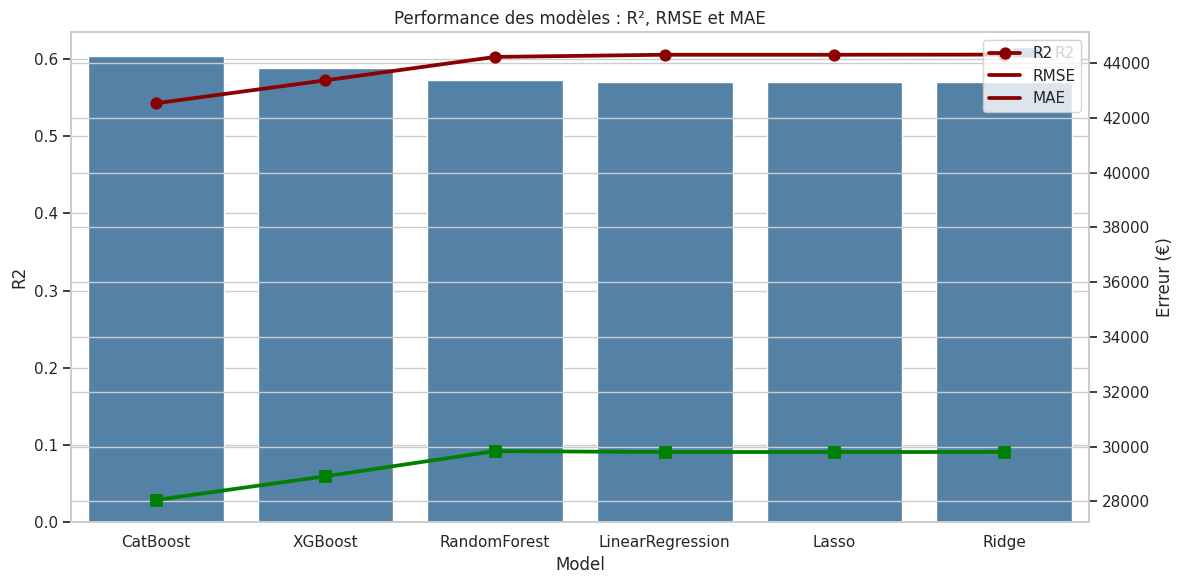

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Taille du plot
plt.figure(figsize=(12,6))

# R²
sns.barplot(x="Model", y="R2", data=results_df, color='steelblue', label='R2')

# Ajouter RMSE sur un second axe
ax2 = plt.twinx()
sns.pointplot(x="Model", y="RMSE", data=results_df, color='darkred', label='RMSE', markers='o')
sns.pointplot(x="Model", y="MAE", data=results_df, color='green', label='MAE', markers='s')

# Labels et titre
plt.title("Performance des modèles : R², RMSE et MAE")
plt.ylabel("R²")
ax2.set_ylabel("Erreur (€)")
ax2.set_xticklabels(results_df["Model"], rotation=45)
plt.legend(["R2", "RMSE", "MAE"], loc="upper right")

plt.tight_layout()
plt.show()


# Optimisation des hyperparamètres : GridSearchCV

Cette cellule effectue une recherche exhaustive des meilleurs hyperparamètres pour les modèles **XGBoost** et **CatBoost** :

1. **XGBoost** :
   - Grille de paramètres : `n_estimators`, `max_depth`, `learning_rate`, `subsample`, `colsample_bytree`.
   - Validation croisée à 3 plis pour évaluer la performance.
   - Calcul du **R²** et du **RMSE** sur le jeu de test après optimisation.

2. **CatBoost** :
   - Grille de paramètres : `iterations`, `depth`, `learning_rate`, `l2_leaf_reg`.
   - Validation croisée à 3 plis pour évaluer la performance.
   - Calcul du **R²** et du **RMSE** sur le jeu de test après optimisation.

Cette étape permet d'obtenir les combinaisons de paramètres qui maximisent la capacité prédictive du modèle tout en réduisant l'erreur.


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

# -------------------------------
# XGBoost GridSearch
# -------------------------------
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)

xgb_param_grid = {
    'n_estimators': [200, 400, 600],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 0.85, 1.0],
    'colsample_bytree': [0.7, 0.85, 1.0]
}

xgb_grid = GridSearchCV(
    estimator=xgb_model,
    param_grid=xgb_param_grid,
    scoring='r2',
    cv=3,
    verbose=1,
    n_jobs=-1
)

xgb_grid.fit(X_train, y_train)
print("XGBoost Best params:", xgb_grid.best_params_)
xgb_preds = xgb_grid.predict(X_test)
print("XGBoost R2:", r2_score(y_test, xgb_preds))
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_preds))
print("XGBoost RMSE:", xgb_rmse)


# -------------------------------
# CatBoost GridSearch
# -------------------------------
cat_model = CatBoostRegressor(random_state=42, verbose=0)

cat_param_grid = {
    'iterations': [500, 1000],
    'depth': [4, 6, 8],
    'learning_rate': [0.01, 0.05, 0.1],
    'l2_leaf_reg': [1, 3, 5]
}

cat_grid = GridSearchCV(
    estimator=cat_model,
    param_grid=cat_param_grid,
    scoring='r2',
    cv=3,
    verbose=1,
    n_jobs=-1
)

cat_grid.fit(X_train, y_train)
print("CatBoost Best params:", cat_grid.best_params_)
cat_preds = cat_grid.predict(X_test)
print("CatBoost R2:", r2_score(y_test, cat_preds))
cat_rmse = np.sqrt(mean_squared_error(y_test, cat_preds))
print("CatBoost RMSE:", cat_rmse)


Fitting 3 folds for each of 243 candidates, totalling 729 fits
XGBoost Best params: {'colsample_bytree': 0.85, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 400, 'subsample': 0.85}
XGBoost R2: 0.6046237101909818
XGBoost RMSE: 42501.199338732076
Fitting 3 folds for each of 54 candidates, totalling 162 fits
CatBoost Best params: {'depth': 8, 'iterations': 500, 'l2_leaf_reg': 3, 'learning_rate': 0.05}
CatBoost R2: 0.6026895140793802
CatBoost RMSE: 42605.031262236545


# Analyse des résultats et visualisation

Cette cellule fournit plusieurs visualisations pour comprendre les performances et l’interprétabilité des modèles optimisés :

1. **Importance des caractéristiques (Feature Importance)** :
   - **XGBoost** : Top 20 features les plus influentes sur la prédiction du salaire.
   - **CatBoost** : Top 20 features les plus influentes sur la prédiction du salaire.
   - Ces graphiques permettent d’identifier quelles compétences, technologies ou variables impactent le plus le salaire.

2. **Prédiction vs Réel (Scatter plot)** :
   - Compare les salaires prédits par XGBoost et CatBoost avec les valeurs réelles.
   - La ligne rouge représente l’égalité parfaite. Plus les points sont proches de cette ligne, meilleure est la prédiction.

3. **Distribution des erreurs de prédiction** :
   - Histogrammes des erreurs (y_test - prédictions) pour XGBoost et CatBoost.
   - Permet de visualiser la dispersion des erreurs et d’identifier les biais éventuels (sur- ou sous-estimation).

Ces visualisations sont essentielles pour l’analyse qualitative des modèles et la communication des résultats dans le rapport.


/tmp/ipython-input-2959337462.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=xgb_top20.values, y=xgb_top20.index, palette='viridis')


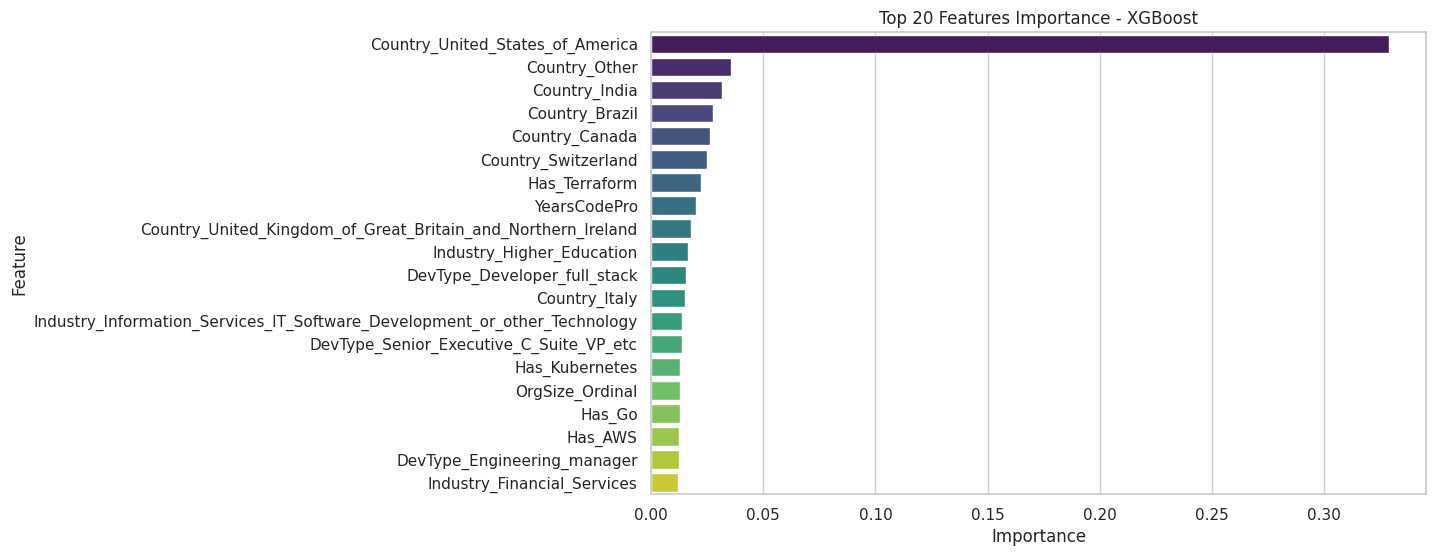

/tmp/ipython-input-2959337462.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cat_top20.values, y=cat_top20.index, palette='magma')


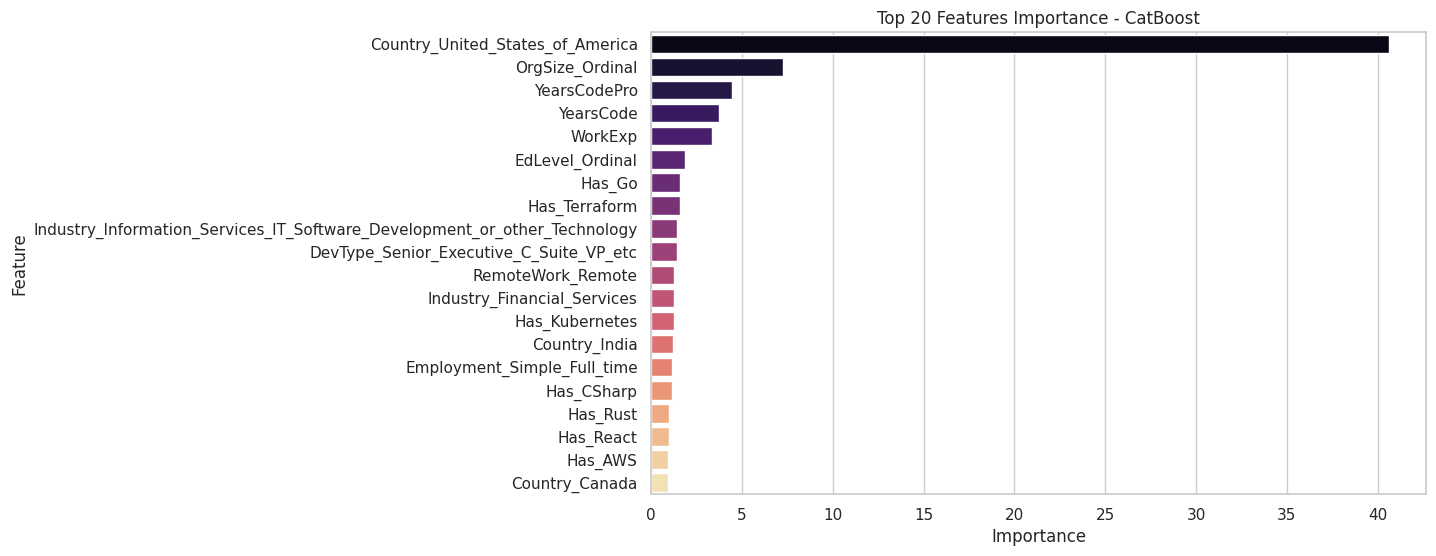

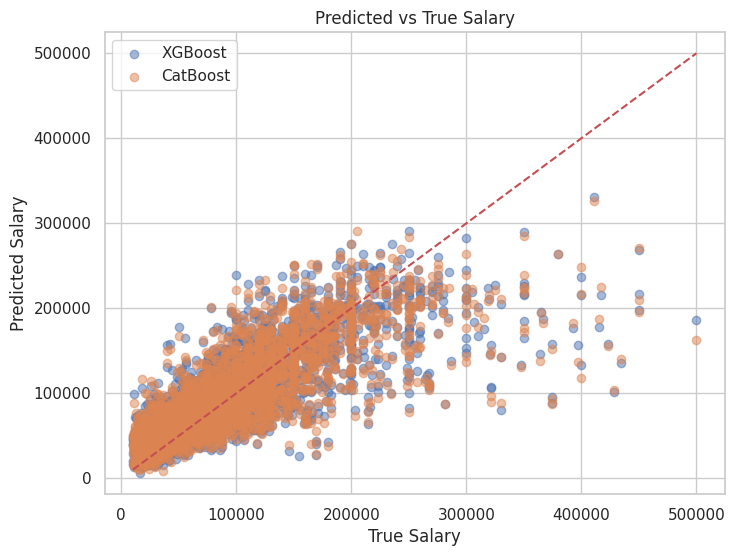

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


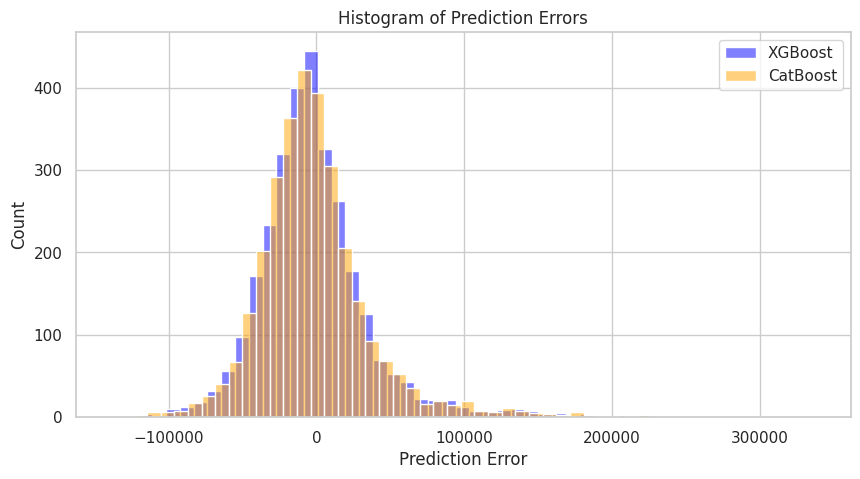

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# -------------------------
# Feature Importance XGBoost
# -------------------------
xgb_model = xgb_grid.best_estimator_  # ton modèle XGBoost optimisé
xgb_importances = pd.Series(xgb_model.feature_importances_, index=X.columns)
xgb_top20 = xgb_importances.sort_values(ascending=False).head(20)

plt.figure(figsize=(10,6))
sns.barplot(x=xgb_top20.values, y=xgb_top20.index, palette='viridis')
plt.title("Top 20 Features Importance - XGBoost")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

# -------------------------
# Feature Importance CatBoost
# -------------------------
cat_model = cat_grid.best_estimator_  # ton modèle CatBoost optimisé
cat_importances = pd.Series(cat_model.get_feature_importance(), index=X.columns)
cat_top20 = cat_importances.sort_values(ascending=False).head(20)

plt.figure(figsize=(10,6))
sns.barplot(x=cat_top20.values, y=cat_top20.index, palette='magma')
plt.title("Top 20 Features Importance - CatBoost")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

# -------------------------
# Scatter plot Predicted vs True
# -------------------------
xgb_preds = xgb_model.predict(X_test)
cat_preds = cat_model.predict(X_test)

plt.figure(figsize=(8,6))
plt.scatter(y_test, xgb_preds, alpha=0.5, label='XGBoost')
plt.scatter(y_test, cat_preds, alpha=0.5, label='CatBoost')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("True Salary")
plt.ylabel("Predicted Salary")
plt.title("Predicted vs True Salary")
plt.legend()
plt.show()

# -------------------------
# Histogram of Prediction Errors
# -------------------------
xgb_errors = y_test - xgb_preds
cat_errors = y_test - cat_preds

plt.figure(figsize=(10,5))
sns.histplot(xgb_errors, bins=50, color='blue', alpha=0.5, label='XGBoost')
sns.histplot(cat_errors, bins=50, color='orange', alpha=0.5, label='CatBoost')
plt.xlabel("Prediction Error")
plt.title("Histogram of Prediction Errors")
plt.legend()
plt.show()
